# Práctica 3 - MLP Banca
## Introducción

Texto

## Implementación
### Importar librerías de código

En nuestro caso hemos reducido al mínimo el número de librerías de código a utilizar para esta práctica; en nuestro caso utilizamos las siguientes:

- <ins>Tensorflow</ins> &rarr; TensorFlow es una biblioteca de software gratuita y de código abierto para el aprendizaje automático y la inteligencia artificial. Utilizamos Tensorflow para:
  - Modelos de Keras:
    - Creación 🧠
    - Entrenamiento 🏋
    - Validación ✅
  - Visualización de modelos 📊
- <ins>IPython</ins> &rarr; IPython es un shell de comandos para computación interactiva en múltiples lenguajes de programación, desarrollado originalmente para el lenguaje de programación Python. Utilizamos IPython para:
  - Creación y visualización de imágenes 🖼
- <ins>Numpy</ins> &rarr; Es una librería numérica que trae el poder computacional de lenguajes como C y Fortran a Python. Utilizamos Numpy para:
  - Utilizar arrays 🔲
  - Generar números aleatorios 🔢
  - Generar arrays a partir de distribuciones numéricas 📶
- <ins>Pandas</ins> &rarr; Es una librería de manipulación y análisis de datos de código abierto rápida, potente, flexible y fácil de usar, construida sobre el lenguaje de programación Python. Usamos Pandas para:
  - Abrir archivos .csv 📂
  - Dataframes 📅
- <ins>Matplotlib</ins> &rarr; Es una librería para crear visualizaciones estáticas, animadas e interactivas en Python. Usamos Matplotlib para:
  - Mostrar gráficos 📊
  - Tipo de renderizado `inline`
- <ins>Shap</ins> &rarr; SHAP (SHapley Additive exPlanations) es un enfoque de teoría de juegos para explicar el resultado de cualquier modelo de aprendizaje automático.. Usamos Shap para:
  - Analizar la importancia de las variables 📊
  - Necesitamos `numba` para la correcta funcionalidad de esta librería

In [ ]:
print('Versiones de las librerías con las que vamos a trabajar:')
import tensorflow as tf
import keras as ks
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
print('\tTensorflow y Keras\t>>> \tv', tf.__version__)
import numpy as np
print('\tNumpy\t\t\t>>> \tv', np.__version__)
import sklearn as sk
print('\tSklearn\t\t\t>>> \tv', sk.__version__)
import pandas as pd
print('\tPandas\t\t\t>>> \tv', pd.__version__)
import numba
print('\tNumba\t\t\t>>> \tv', numba.__version__)
import matplotlib as mplt
import matplotlib.pyplot as plt
%matplotlib inline
print('\tMatplotlib\t\t\t>>> \tv', mplt.__version__)
#!pip install shap
import shap
print('\tShap\t\t\t>>> \tv', shap.__version__)
import warnings
warnings.filterwarnings('ignore')


Versiones de las librerías con las que vamos a trabajar:
	Tensorflow y Keras	>>> 	v 2.11.0
	Numpy			>>> 	v 1.22.4
	Sklearn			>>> 	v 1.2.2
	Pandas			>>> 	v 1.4.4
	Numba			>>> 	v 0.56.4
	Matplotlib			>>> 	v 3.7.1
	Shap			>>> 	v 0.41.0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank-dataset.csv to bank-dataset.csv


### Preprocesamiento
#### Eliminar variables irelevantes

In [ ]:
df = pd.read_csv("bank-dataset.csv", delimiter=';') # Leemos el csv
df=df.drop(['day_of_week','month','default','housing','loan'],axis=1) # Dropeamos las columnas que dice el enunciado por no ser significativas para el resultado,
# hemos comprabado que si las usamos tarma bastante mas en aprender el modelo hasta llegar a la misma precisión que sin ellas.
df.head(10) # Mostramos unas pocas lineas


,age,job,marital,education,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,telephone,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,telephone,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,telephone,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,telephone,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,telephone,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df_unk = df[df.isin(['unknown']).any(axis=1)] # Obtenemos todas las lineas que contengan 'unknown' en alguna columna
df=df.drop(df_unk.index) # Las quitamos del dataframe
df.head(10) # Mostramos unas pocas lineas

,age,job,marital,education,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,telephone,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,telephone,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,telephone,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,telephone,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11,25,services,single,high.school,telephone,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Convertimos todos los valores cualitativos a numéricos

In [ ]:
cols_names = df.columns # Obtenemos los nombres de las columnas
cols_types = df.dtypes # Obtenemos los tipos de los datos de las columnas
print(cols_types) # Los enseñamos

i = 0
for col_type in cols_types: # Iteramos según el tipo de datos de las columnas
    if col_type == 'object': # La columna cuyo tipo de datos sea 'object'  string, indica que son variables cualitativas que hay que sustituir
        col = cols_names[i] # Nos quedamos el nombre de la columna para indexar en pandas
        vals = df[col].unique() # Obtenemos todos los valores unicos de los datos de la columna
        for j in range(len(vals)): # Los sustituimos por una variable numerica que va aumentando de 0 al número de valores unicos que haya
            df[col] = df[col].replace(vals[j], j)
    i += 1

age                 int64
job                object
marital            object
education          object
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

def split_training_class(p_e, cols_class, df_): # Una función para separar la variable objetivo o clase y separar los datos de training y validación
    if (p_e > 99) or (p_e < 1):
        raise Exception("Procentaje de test no valido") # Si el procentaje es invalido dará un error
    salidas = df_.pop(cols_class) # Quitamos la variable objetivo de los datos
    return train_test_split(df_, salidas, test_size=(p_e/100), random_state=0) # Devolvemos la salida de la función separando los datos

training_data, validation_data, training_target, validation_target = split_training_class(20, 'y', df) # Metemos los datos a la función (porcentaje_validación, columna_objetivo, dataframe)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Nomralizamos los datos
scaler.fit(training_data)
training_data_std = scaler.transform(training_data) # Entrenamiento
scaler = StandardScaler()
scaler.fit(validation_data)
validation_data_std = scaler.transform(validation_data) # Validación

### Modelo

#### Análisis de Entrenamiento

In [ ]:
from google.colab import files
uploaded_2 = files.upload()

Saving out_grande.csv to out_grande (1).csv


In [ ]:
print('\nA continuación mostramos el dataframe con las pruebas realizadas, donde hemos visto que la combinación relu,sigmoidea es la mejor.\n')
df_entrenamientos = pd.read_csv("out_grande.csv") # Cargamos nuestro csv de pruebas
df_entrenamientos = df_entrenamientos[['Capas','Learning_rate','neuronas_capa','Iteraciones','validation_data_loss','validation_data_acc','Funciones_activacion','Tiempo_compilar_segs']] # Guardamos las columnas que queremos
df_entrenamientos = df_entrenamientos.sort_values(by=['Learning_rate','neuronas_capa','Iteraciones']).reset_index().drop(['index', 'Capas'], axis=1) # Las ordenamos según valores
pd.set_option('display.max_rows', df.shape[0]+1) # Hacemos que se muestren todas las filas
df_entrenamientos


A continuación mostramos el dataframe con las pruebas realizadas, donde hemos visto que la combinación relu,sigmoidea es la mejor.



,Learning_rate,neuronas_capa,Iteraciones,validation_data_loss,validation_data_acc,Funciones_activacion,Tiempo_compilar_segs
0,0.000010,[1.045e+03 1.000e+00],2.0,0.083802,0.905430,"['relu', 'sigmoid']",2.866825
1,0.000010,[1.045e+03 1.000e+00],4.0,0.068886,0.909385,"['relu', 'sigmoid']",5.311539
2,0.000010,[1.045e+03 1.000e+00],6.0,0.064742,0.911766,"['relu', 'sigmoid']",7.782165
3,0.000010,[1.045e+03 1.000e+00],8.0,0.063210,0.913297,"['relu', 'sigmoid']",10.240495
4,0.000010,[1.045e+03 1.000e+00],10.0,0.062512,0.913935,"['relu', 'sigmoid']",12.738197
5,0.000010,[1.045e+03 1.000e+00],12.0,0.062101,0.914402,"['relu', 'sigmoid']",15.203098
6,0.000010,[1.045e+03 1.000e+00],14.0,0.061813,0.914657,"['relu', 'sigmoid']",17.680072
7,0.000010,[1.045e+03 1.000e+00],16.0,0.061572,0.914530,"['relu', 'sigmoid']",20.207748
8,0.000010,[1.045e+03 1.000e+00],18.0,0.061376,0.914700,"['relu', 'sigmoid']",22.665456
9,0.000010,[1.045e+03 1.000e+00],20.0,0.061184,0.914743,"['relu', 'sigmoid']",25.135249


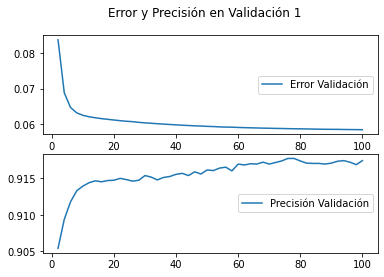

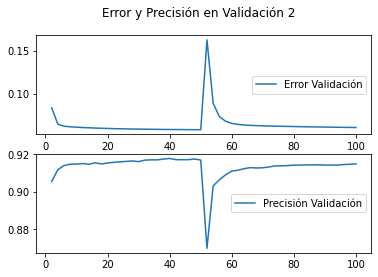

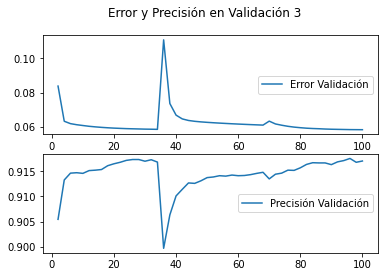

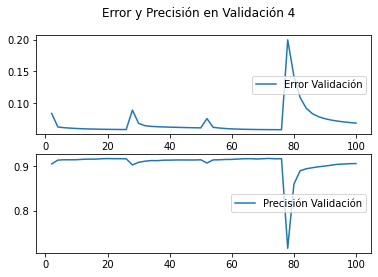

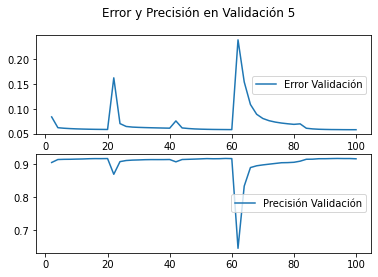

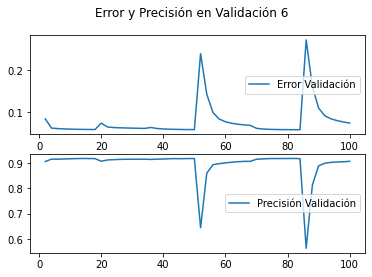

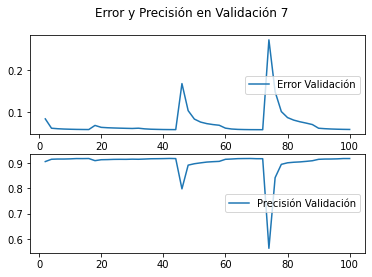

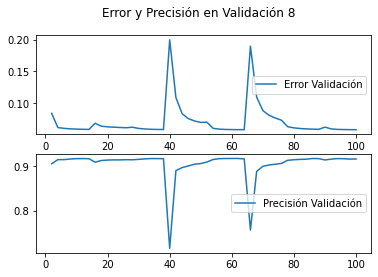

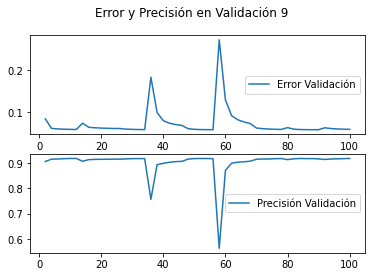

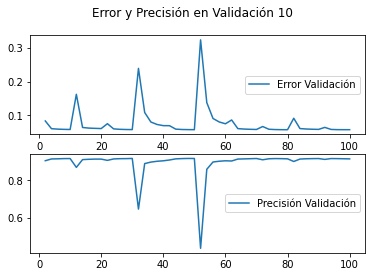

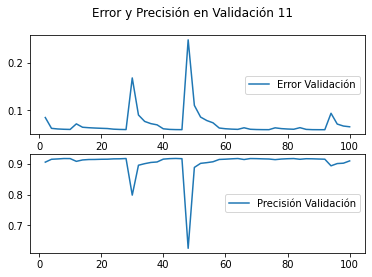

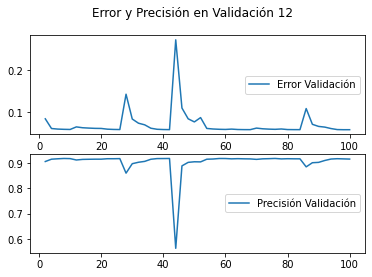

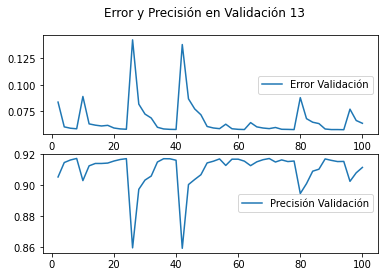

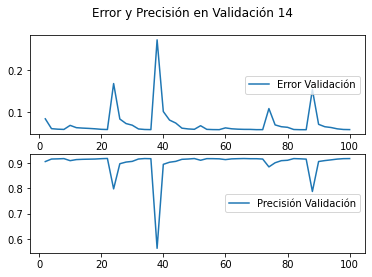

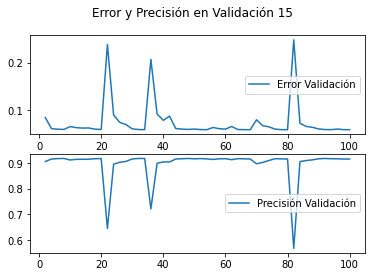

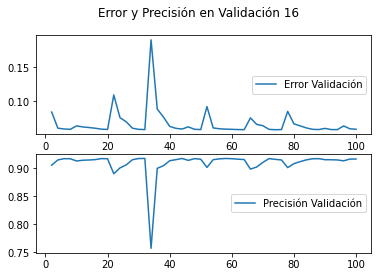

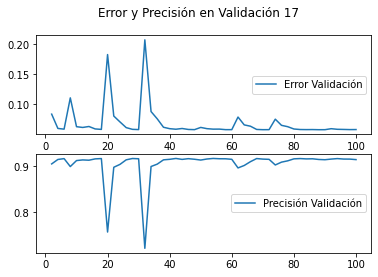

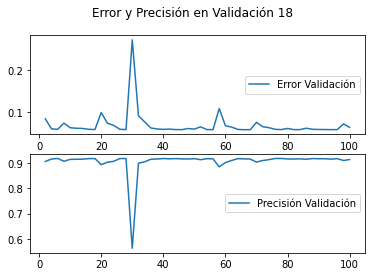

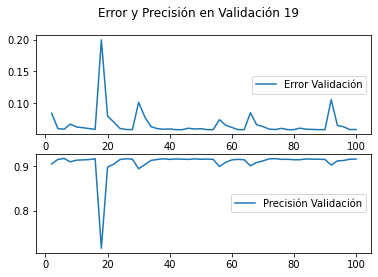

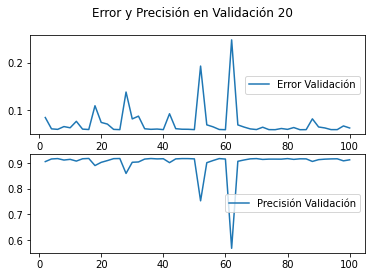

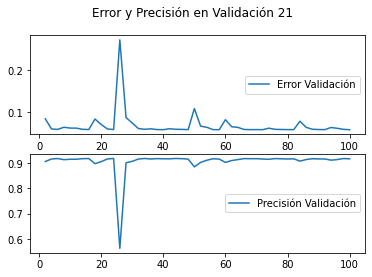

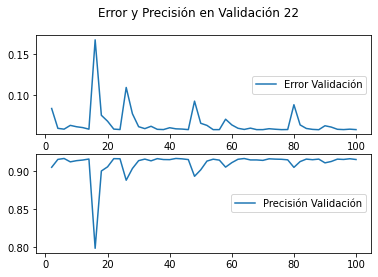

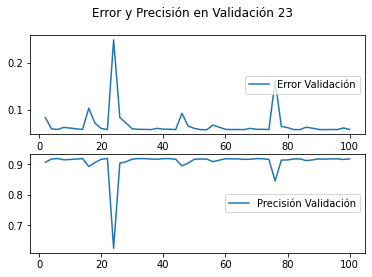

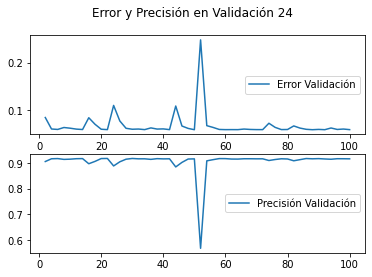

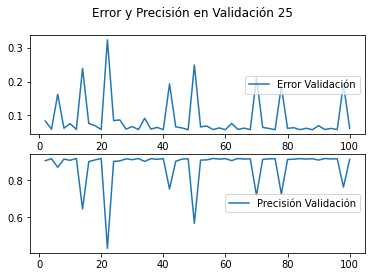

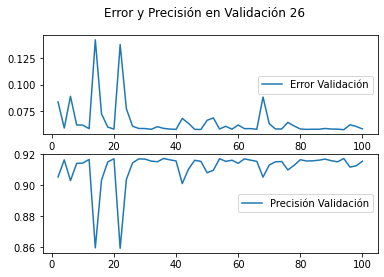

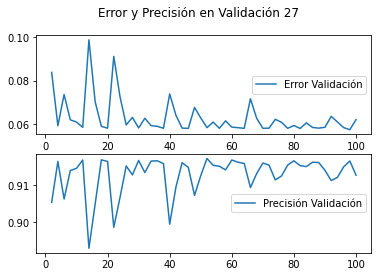

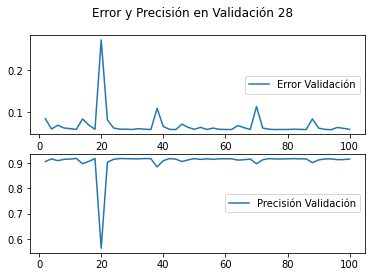

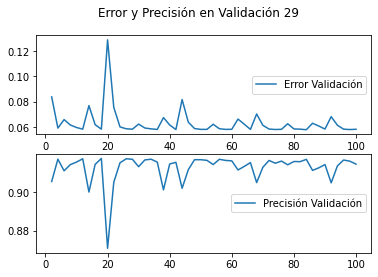

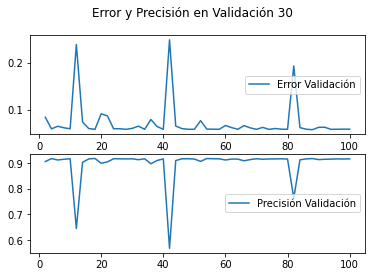

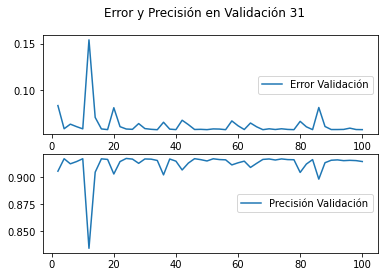

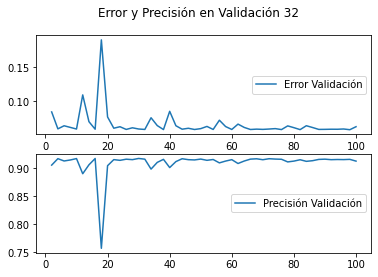

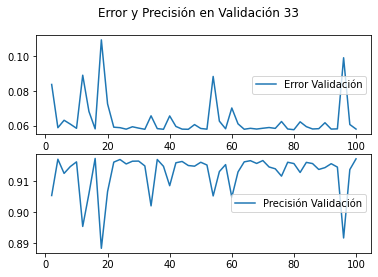

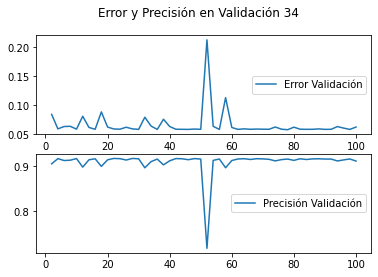

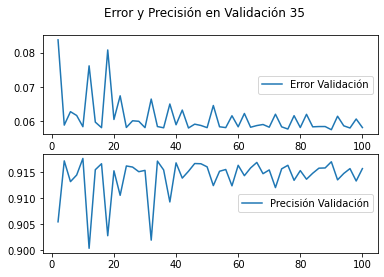



 Podemos observar que los primeros 3 modelos son los más consistenes, siendo el 3º para las primeras 32 épocas el mejor; por tanto, tomaremos ese modelo como el modelo a analizar.

 También podemos observar que los modelos se vuelven inconsistentes si no se encuentran en el rango debido; es decir: (1045, 4180)


In [ ]:
lr_poss = np.array(df_entrenamientos['Learning_rate'].unique())
nr_poss = np.array([[1045., 1.],[100., 1.],[2000., 1.],[4., 1.],[4180., 1.],[6., 1.],[800., 1.]])
ep_poss = np.array(df_entrenamientos['Iteraciones'].unique())
i = len(lr_poss)
j = len(nr_poss)
k = len(ep_poss)
historico_val_x_modelo_loss = []
historico_val_x_modelo_acc = []
for i in range(0,int(df_entrenamientos.shape[0]/len(ep_poss))):
  modelo_hist_l = []
  modelo_hist_a = []
  for j in range(0,len(ep_poss)):
    modelo_hist_l.append(df_entrenamientos.iloc[i*j+j,3])
    modelo_hist_a.append(df_entrenamientos.iloc[i*j+j,4])

  historico_val_x_modelo_loss.append(modelo_hist_l)
  historico_val_x_modelo_acc.append(modelo_hist_a)

for i in range(0, len(historico_val_x_modelo_loss)):
  print('\n')
  fig, axs = plt.subplots(2)
  fig.suptitle('Error y Precisión en Validación ' + str(i+1))
  axs[0].plot(ep_poss, historico_val_x_modelo_loss[i], label ='Error Validación')
  axs[0].legend(loc='center right')

  axs[1].plot(ep_poss, historico_val_x_modelo_acc[i], label ='Precisión Validación')
  axs[1].legend(loc='center right')
  plt.show()

print('\n\n Podemos observar que los primeros 3 modelos son los más consistenes, siendo el 3º para las primeras 32 épocas el mejor; por tanto, tomaremos ese modelo como el modelo a analizar.')
print('\n También podemos observar que los modelos se vuelven inconsistentes si no se encuentran en el rango debido; es decir: (' + str(round(training_data.shape[0]/(2*training_data.shape[1]))) + ', ' + str(round((2*training_data.shape[0])/training_data.shape[1])) + ')')

### Para el mejor modelo encontrado

In [ ]:
import time
import keras as ks
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

nueronas_ocultas = 2000 # Neuronas ocultas de uno de los mejores modelos de una capa
nueronas_output = 1 # Neuronas de salida (0 o 1)
lrn = lr_poss[0] # Learning rate del mejor modelo
eps = ep_poss[16] # Epochs del mejor modelo

model = Sequential() # Creamos un modelo secuencial
model.add(ks.Input(shape = (training_data_std.shape[1]))) # Le damos el tamaño de los datos de entrada para que se cree la capa de entrada del modelo
model.add(Dense(nueronas_ocultas, activation='relu')) # Añadimos la capa oculta con el número de neuronas definido arriba y la función de activación relu.
model.add(Dense(nueronas_output, activation='sigmoid')) # Añadimos la capa de salida con el número de neuronas definido arriba y la función de activación sigmoide.

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=lrn), metrics=["accuracy"]) # Compilamos el modelo, optimizador adam, learning rate y metricas

evaluate_every_x_epochs = 1 # Vamos a evaluar el modelo con los datos de validación cada x epochs para ver como evoluciona


n = int(eps/evaluate_every_x_epochs) # Dividimos el número de epochs entre cada cuanto vamos a evaluar el modelo para conseguir el número de pasos
time_s = time.time() # Vamos a ir guardando tambien el tiempoq ue tarda en compilarse

res = []
history = []
for i in range(n): # vamos a ir iterando estos pasos, y en cada uno se harán n epochs y una validación, de las cuales guardaremos los resultados para mostrarlos
    history.append(model.fit(training_data_std, training_target, epochs=evaluate_every_x_epochs, validation_data = (validation_data_std, validation_target), verbose=0)) # Entrenamos
    evalu = model.evaluate(validation_data_std, validation_target, verbose=0) # (validation_loss, validation_accuracy)
    time_f = time.time() - time_s # Guardamos el tiempo
    res.append([lrn, time_f, (i+1)*evaluate_every_x_epochs, evalu[0], evalu[1]]) # Y lo almacenamos todo en una lista



#### Resultados

In [ ]:
res # Resultado

[[1e-05, 4.071304082870483, 1, 0.10235489904880524, 0.8960326313972473],
 [1e-05, 10.45757508277893, 2, 0.0796079933643341, 0.899476945400238],
 [1e-05, 16.035037755966187, 3, 0.07275744527578354, 0.9007526636123657],
 [1e-05, 19.05455994606018, 4, 0.06961004436016083, 0.9031764268875122],
 [1e-05, 24.821576833724976, 5, 0.06791986525058746, 0.9052175283432007],
 [1e-05, 28.2263240814209, 6, 0.06698565185070038, 0.9067482948303223],
 [1e-05, 31.221628189086914, 7, 0.06634741276502609, 0.9077688455581665],
 [1e-05, 37.12890005111694, 8, 0.06594574451446533, 0.9081515669822693],
 [1e-05, 40.54444193840027, 9, 0.06565459072589874, 0.9076412916183472],
 [1e-05, 43.34767937660217, 10, 0.06542497873306274, 0.9075137376785278],
 [1e-05, 46.13351321220398, 11, 0.06526580452919006, 0.9077688455581665],
 [1e-05, 51.709556579589844, 12, 0.06512827426195145, 0.9077688455581665],
 [1e-05, 54.77655863761902, 13, 0.06495142728090286, 0.9072585701942444],
 [1e-05, 57.79471445083618, 14, 0.064778149127

In [ ]:
# loss - acc - val_loss - val_acc
for i in range(len(history)):
  history[i] = list(history[i].history.values())

for i in range(0,len(history)):
  for j in range(0,len(history[0])):
    history[i][j]= history[i][j][0]

print(history)

history = np.transpose(history)
history

[[0.1529923677444458, 0.8792740702629089, 0.10235489904880524, 0.8960326313972473], [0.08571555465459824, 0.9035149216651917, 0.0796079933643341, 0.899476945400238], [0.07268720865249634, 0.9055562615394592, 0.07275744527578354, 0.9007526636123657], [0.06786765158176422, 0.9075019359588623, 0.06961004436016083, 0.9031764268875122], [0.06549534946680069, 0.9097984433174133, 0.06791986525058746, 0.9052175283432007], [0.06418757140636444, 0.9109147787094116, 0.06698565185070038, 0.9067482948303223], [0.06339632719755173, 0.9113932251930237, 0.06634741276502609, 0.9077688455581665], [0.06288598477840424, 0.9120630025863647, 0.06594574451446533, 0.9081515669822693], [0.06250598281621933, 0.9127328395843506, 0.06565459072589874, 0.9076412916183472], [0.06226275488734245, 0.9130517840385437, 0.06542497873306274, 0.9075137376785278], [0.06201954558491707, 0.9132750630378723, 0.06526580452919006, 0.9077688455581665], [0.06184347718954086, 0.9134664535522461, 0.06512827426195145, 0.9077688455581

array([[0.15299237, 0.08571555, 0.07268721, 0.06786765, 0.06549535,
        0.06418757, 0.06339633, 0.06288598, 0.06250598, 0.06226275,
        0.06201955, 0.06184348, 0.06167776, 0.06151403, 0.06136712,
        0.06123004, 0.06109582, 0.06097227, 0.06086268, 0.06074403,
        0.06063445, 0.06052716, 0.0604349 , 0.06032794, 0.06024684,
        0.06014508, 0.06007529, 0.05998794, 0.05989583, 0.05983672,
        0.05974814, 0.05968357, 0.0596039 , 0.05953993],
       [0.87927407, 0.90351492, 0.90555626, 0.90750194, 0.90979844,
        0.91091478, 0.91139323, 0.912063  , 0.91273284, 0.91305178,
        0.91327506, 0.91346645, 0.9136259 , 0.91400868, 0.91416818,
        0.91435951, 0.91435951, 0.91458279, 0.91467851, 0.91458279,
        0.9145509 , 0.9151569 , 0.91493368, 0.91544402, 0.91538018,
        0.9154759 , 0.91573107, 0.91582674, 0.91541207, 0.91544402,
        0.91589051, 0.91573107, 0.91553968, 0.91601813],
       [0.1023549 , 0.07960799, 0.07275745, 0.06961004, 0.06791987,
  

### Evaluación del modelo
#### Preparar variables

In [ ]:
# Predict
pred = model.predict(validation_data_std)
pred_cmatrix = pred.flatten()
pred_cmatrix = pd.Series(pred_cmatrix.tolist(), name='y').round()

validation_target_cmatrix = validation_target.reset_index().drop(['index'],axis=1).squeeze()

pred_cmatrix


245/245 [==============================] - 0s 1ms/step


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      1.0
16      0.0
17      1.0
18      1.0
19      0.0
20      0.0
21      0.0
22      1.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
30      0.0
31      0.0
32      0.0
33      0.0
34      0.0
35      0.0
36      0.0
37      0.0
38      0.0
39      0.0
40      0.0
41      1.0
42      0.0
43      0.0
44      0.0
45      1.0
46      0.0
47      0.0
48      0.0
49      0.0
50      0.0
51      0.0
52      0.0
53      0.0
54      0.0
55      0.0
56      0.0
57      0.0
58      0.0
59      0.0
60      0.0
61      0.0
62      0.0
63      0.0
64      0.0
65      0.0
66      0.0
67      0.0
68      0.0
69      0.0
70      0.0
71      0.0
72      0.0
73      0.0
74      0.0
75      1.0
76      0.0
77      0.0
78      0.0
79      0.0
80      0.0
81      0.0
82      0.0
83  

#### Evaluación de la arquitectura

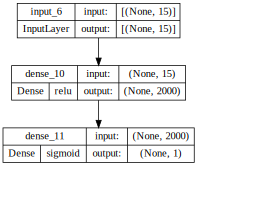

In [ ]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

#!conda install -c anaconda graphviz
#!conda install -c conda-forge pydot
# ^ para ks.utils.plot_model ^

display(SVG(model_to_dot(
    model,
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    show_layer_activations=True).create(prog='dot', format='svg')))

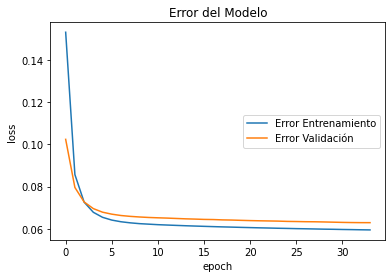

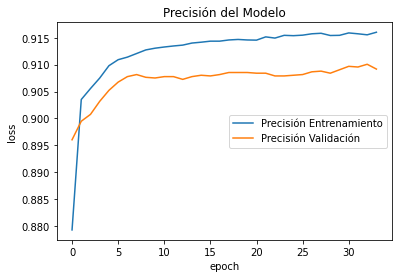

,Epoch,Loss,Accuracy,Val_loss,Val_accuracy
0,1,0.152992,0.879274,0.102355,0.896033
1,2,0.085716,0.903515,0.079608,0.899477
2,3,0.072687,0.905556,0.072757,0.900753
3,4,0.067868,0.907502,0.069610,0.903176
4,5,0.065495,0.909798,0.067920,0.905218
5,6,0.064188,0.910915,0.066986,0.906748
6,7,0.063396,0.911393,0.066347,0.907769
7,8,0.062886,0.912063,0.065946,0.908152
8,9,0.062506,0.912733,0.065655,0.907641
9,10,0.062263,0.913052,0.065425,0.907514


In [ ]:
def _graphModel(history):
  plt.plot(history[0], label ='Error Entrenamiento')
  plt.plot(history[2], label ='Error Validación')
  plt.title('Error del Modelo')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(loc='center right')
  plt.show()
  #plt.savefig('Visualizar_Modelos/model_loss.png')

  plt.plot(history[1], label ='Precisión Entrenamiento')
  plt.plot(history[3], label ='Precisión Validación')
  plt.title('Precisión del Modelo')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(loc='center right')
  plt.show()
  #plt.savefig('Visualizar_Modelos/model_loss.png')
  return
_graphModel(history)
history_df = np.transpose(history)
dict_ideal = {'Epoch': np.array(list(range(1,35))), 'Loss': history_df[:,0], 'Accuracy': history_df[:,1], 'Val_loss': history_df[:,2], 'Val_accuracy':history_df[:,3]}
df_modelo_ideal = pd.DataFrame(dict_ideal)
pd.set_option('display.max_rows', df_modelo_ideal.shape[0]+1)
df_modelo_ideal.to_csv("L2P3-EntrenamientoMejorModelo.csv", index = False)
df_modelo_ideal

#### Matriz de confusión

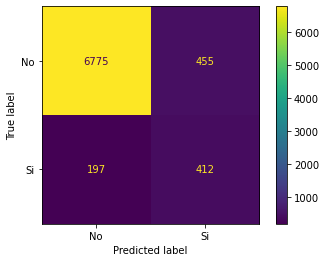

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def _conf_matrix(pred_cmatrix, validation_target_cmatrix):
  c_matrix = confusion_matrix(pred_cmatrix,validation_target_cmatrix)
  cm_disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                                display_labels=['No','Si'])
  cm_disp.plot()
  plt.show()
  return
_conf_matrix(pred_cmatrix, validation_target_cmatrix)

#### Importancia de las variables

  0%|          | 0/7839 [00:00<?, ?it/s]

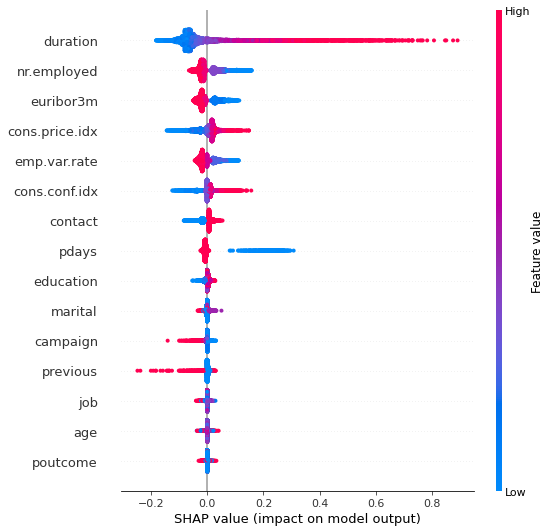

In [ ]:
def feature_Importance(modelo, training_data, validation_data, vars):
  background = training_data[np.random.choice(training_data.shape[0], 100, replace=False)]
  explainer = shap.KernelExplainer(modelo, background)
  shap_values = explainer.shap_values(validation_data, nsamples=100)
  shap.initjs()
  shap.force_plot(explainer.expected_value[0], shap_values[0][0], features = vars)
  return shap.summary_plot(shap_values[0], validation_data_std, feature_names = variables)
variables = list(df.columns)
feature_Importance(model, training_data_std, validation_data_std, variables)

### Prueba de casos especiales

Vamos a probar tres formas de eliminar los 'unknown' y ver como afectan estas formas y que precisión conseguimos en estos datos. Son los datos de test ya que al tener almenos una columna sin información la red lo tiene mas dificil para clasificarlos.

In [ ]:
df_unk_cero = df_unk.copy() # Copiamos el dataframe de los datos que conienen unknown
df_unk_cero # Mostramos

,age,job,marital,education,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7,41,blue-collar,married,unknown,telephone,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,telephone,55,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
26,59,technician,married,unknown,telephone,93,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
29,55,unknown,married,university.degree,telephone,362,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
30,46,admin.,married,unknown,telephone,348,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,technician,married,unknown,cellular,162,2,999,2,failure,-1.1,94.767,-50.8,1.046,4963.6,no
41120,60,admin.,married,unknown,cellular,333,2,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,no
41122,34,technician,married,unknown,cellular,985,3,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes
41135,54,technician,married,unknown,cellular,222,1,999,1,failure,-1.1,94.767,-50.8,1.041,4963.6,no


#### Preprocesamiento de casos especiales

La primera forma va a ser directamente cambiar los 'unknown' por cero y ver el resultado para este modelo.

In [ ]:
cols_names = df_unk_cero.columns # Funciona de la misma manera que cambiamos las variables cualitativas
cols_types = df_unk_cero.dtypes # para nuestro dataframe principal, solo que omitimos el cambiar los 'unknown' ya que los cambiaremos mas tarde
i = 0

for col_type in cols_types:
    if col_type == 'object':
        col = cols_names[i]
        vals = df_unk_cero[col].unique()
        for j in range(len(vals)):
            if vals[j] != 'unknown':
                df_unk_cero[col] = df_unk_cero[col].replace(vals[j], j)
    i += 1
df_format = df_unk_cero.copy()
df_unk_cero # Mostramos como queda el dataframe

,age,job,marital,education,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7,41,0,0,unknown,0,217,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
10,41,0,0,unknown,0,55,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
26,59,1,0,unknown,0,93,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
29,55,unknown,0,1,0,362,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
30,46,3,0,unknown,0,348,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,1,0,unknown,1,162,2,999,2,1,-1.1,94.767,-50.8,1.046,4963.6,0
41120,60,3,0,unknown,1,333,2,999,0,0,-1.1,94.767,-50.8,1.046,4963.6,0
41122,34,1,0,unknown,1,985,3,999,0,0,-1.1,94.767,-50.8,1.046,4963.6,1
41135,54,1,0,unknown,1,222,1,999,1,1,-1.1,94.767,-50.8,1.041,4963.6,0


In [ ]:
# Asignarles cero
df_unk_cero = df_unk_cero.replace('unknown', 0)
df_unk_cero # Mostramos

,age,job,marital,education,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7,41,0,0,0,0,217,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
10,41,0,0,0,0,55,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
26,59,1,0,0,0,93,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
29,55,0,0,1,0,362,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
30,46,3,0,0,0,348,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,1,0,0,1,162,2,999,2,1,-1.1,94.767,-50.8,1.046,4963.6,0
41120,60,3,0,0,1,333,2,999,0,0,-1.1,94.767,-50.8,1.046,4963.6,0
41122,34,1,0,0,1,985,3,999,0,0,-1.1,94.767,-50.8,1.046,4963.6,1
41135,54,1,0,0,1,222,1,999,1,1,-1.1,94.767,-50.8,1.041,4963.6,0


In [ ]:
df_unk_target = df_unk_cero.pop('y') # Separamos la variable objetivo
scaler = StandardScaler()
scaler.fit(df_unk_cero) # Normalizamos los datos para darselos al modelo
df_unk_cero_std = scaler.transform(df_unk_cero)
evalu = model.evaluate(df_unk_cero_std, df_unk_target, verbose=0) # Evaluamos el modelo

print("Test loss: ", evalu[0], "\nTest acc: ", evalu[1]) # Aqui tenemos la precisión de este metodo

Test loss:  0.07266679406166077 
Test acc:  0.89934903383255


media de los valores limite de la columna

In [ ]:
df_unk_med = df_format.copy() # Dataframe sin variables cualitativos, execpto 'unknown'
df_unk_med_target = df_unk_med.pop('y') # separamos la variable objetivo
cols_names = df_unk_med.columns
cols_types = df_unk_med.dtypes



for col in cols_names: # Iteramos según los nombres de las columnas
    med = (df[col].max()+df[col].min())/2 # Hallamos la media de los valores maximo y minimo (sin normalizar)
    print(col)
    print(med)
    print("\n")
    df_unk_med[col] = df_unk_med[col].replace('unknown', med) # Y si hay 'unknown' en esa columna lo sustituimos por la media

df_unk_med

age
57.5


job
5.0


marital
1.0


education
3.0


contact
0.5


duration
2459.0


campaign
28.5


pdays
499.5


previous
3.5


poutcome
1.0


emp.var.rate
-1.0


cons.price.idx
93.484


cons.conf.idx
-38.849999999999994


euribor3m
2.8395


nr.employed
5095.85




,age,job,marital,education,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7,41,0.0,0.0,3.0,0,217,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
10,41,0.0,0.0,3.0,0,55,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
26,59,1.0,0.0,3.0,0,93,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
29,55,5.0,0.0,1.0,0,362,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
30,46,3.0,0.0,3.0,0,348,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,1.0,0.0,3.0,1,162,2,999,2,1,-1.1,94.767,-50.8,1.046,4963.6
41120,60,3.0,0.0,3.0,1,333,2,999,0,0,-1.1,94.767,-50.8,1.046,4963.6
41122,34,1.0,0.0,3.0,1,985,3,999,0,0,-1.1,94.767,-50.8,1.046,4963.6
41135,54,1.0,0.0,3.0,1,222,1,999,1,1,-1.1,94.767,-50.8,1.041,4963.6


In [ ]:
scaler = StandardScaler()
scaler.fit(df_unk_cero) # Nomralizamos
df_unk_med_std = scaler.transform(df_unk_med)
evalu = model.evaluate(df_unk_med_std, df_unk_med_target, verbose=0) # Evaluamos

print("Test loss: ", evalu[0], "\nTest acc: ", evalu[1]) # Precisión

Test loss:  0.07397395372390747 
Test acc:  0.894842267036438


media todos los valores asignados

In [ ]:
df_unk_med2 = df_format.copy() # Dataframe sin variables cualitativos, execpto 'unknown'
df_unk_med_target2 = df_unk_med2.pop('y') # separamos la variable objetivo
cols_names = df_unk_med2.columns
cols_types = df_unk_med2.dtypes



for col in cols_names:
    med = ( df[col].mean() ) # Obtenemos la media de todos los valores de la columna
    print(col)
    print(med)
    print("\n")
    df_unk_med2[col] = df_unk_med2[col].replace('unknown', med) # Si en la columna hay 'unknown' lo sustituimos

df_unk_med2

age
39.85800311295961


job
3.6073843484473476


marital
0.5067489984945523


education
2.89602204587788


contact
0.637467785971269


duration
257.9955091730244


campaign
2.5663800362328084


pdays
963.5516572682503


previous
0.17042178051083157


poutcome
0.1679977545865122


emp.var.rate
0.0832384986348905


cons.price.idx
93.5717196805389


cons.conf.idx
-40.53714628358552


euribor3m
3.623633334183869


nr.employed
5167.404340282208




,age,job,marital,education,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7,41,0.000000,0.0,2.896022,0,217,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
10,41,0.000000,0.0,2.896022,0,55,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
26,59,1.000000,0.0,2.896022,0,93,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
29,55,3.607384,0.0,1.000000,0,362,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
30,46,3.000000,0.0,2.896022,0,348,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,1.000000,0.0,2.896022,1,162,2,999,2,1,-1.1,94.767,-50.8,1.046,4963.6
41120,60,3.000000,0.0,2.896022,1,333,2,999,0,0,-1.1,94.767,-50.8,1.046,4963.6
41122,34,1.000000,0.0,2.896022,1,985,3,999,0,0,-1.1,94.767,-50.8,1.046,4963.6
41135,54,1.000000,0.0,2.896022,1,222,1,999,1,1,-1.1,94.767,-50.8,1.041,4963.6


In [ ]:
scaler = StandardScaler()
scaler.fit(df_unk_med2) # Normalizamos
df_unk_med_std = scaler.transform(df_unk_med2)
evalu = model.evaluate(df_unk_med2, df_unk_med_target2, verbose=0) # Evaluamos

print("Test loss: ", evalu[0], "\nTest acc: ", evalu[1]) # Precisión

Test loss:  0.1402103155851364 
Test acc:  0.8597896695137024
